In [1]:
import cv2
import numpy as np
from skimage.util import random_noise
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread("Lena.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow('gray', gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
# Add gaussian noise to the image.
noise_img1 = random_noise(gray, mode='gaussian', mean=0, var=0.01)
noise_img1 = np.array(255*noise_img1, dtype = 'uint8')

noise_img2 = random_noise(gray, mode='gaussian', mean=0.1, var=0.01)
noise_img2 = np.array(255*noise_img2, dtype = 'uint8')

noise_img3 = random_noise(gray, mode='gaussian', mean=0.3, var=0.01)
noise_img3 = np.array(255*noise_img3, dtype = 'uint8')

noise_img4 = random_noise(gray, mode='gaussian', mean=0.4, var=0.01)
noise_img4 = np.array(255*noise_img4, dtype = 'uint8')

noise_img5 = random_noise(gray, mode='gaussian', mean=0.5, var=0.01)
noise_img5 = np.array(255*noise_img5, dtype = 'uint8')

noise_img6 = random_noise(gray, mode='gaussian', mean=0, var=0.02)
noise_img6 = np.array(255*noise_img6, dtype = 'uint8')

noise_img7 = random_noise(gray, mode='gaussian', mean=0, var=0.03)
noise_img7 = np.array(255*noise_img7, dtype = 'uint8')

noise_img8 = random_noise(gray, mode='gaussian', mean=0, var=0.04)
noise_img8 = np.array(255*noise_img8, dtype = 'uint8')

noise_img9 = random_noise(gray, mode='gaussian', mean=0, var=0.05)
noise_img9 = np.array(255*noise_img9, dtype = 'uint8')

noise_img10 = random_noise(gray, mode='gaussian', mean=0, var=0.06)
noise_img10 = np.array(255*noise_img10, dtype = 'uint8')

images = [noise_img1, noise_img2, noise_img3, noise_img4, noise_img5, noise_img6, noise_img7, noise_img8, noise_img9, 
          noise_img10]

# Methos 1 of averaging
avg_img = np.mean(images, axis=0)
avg_img = np.array(avg_img, dtype='uint8')
print(avg_img)

# Method 2 of averaging(weighted avg)
avg_image = images[0]
for i in range(1, len(images)):
    alpha = 0.1
    beta = 1.0-alpha
    # alpha*avg_image + beta*images[i]
    avg_image = cv2.addWeighted(images[i], alpha, avg_image, beta, 0.0)

cv2.imshow('Original',gray)
cv2.imshow('blur1',noise_img1)
cv2.imshow('blur2',noise_img2)
cv2.imshow('blur3',noise_img3)
cv2.imshow('blur4',noise_img4)
cv2.imshow('blur5',noise_img5)
cv2.imshow('blur6',noise_img6)
cv2.imshow('blur7',noise_img7)
cv2.imshow('blur8',noise_img8)
cv2.imshow('blur9',noise_img9)
cv2.imshow('blur10',noise_img10)
cv2.imshow('avg_img', avg_img)
cv2.imshow('avg_img1', avg_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[181 188 203 ... 201 187 158]
 [187 183 187 ... 197 175 162]
 [184 211 170 ... 203 150 171]
 ...
 [ 70  80  86 ... 167 121 128]
 [ 77  84  85 ... 126 149 144]
 [ 95  78 106 ... 122 129 135]]


In [10]:
# Manual adding
images = [noise_img1, noise_img2, noise_img3, noise_img4, noise_img5, noise_img6, noise_img7, noise_img8, noise_img9, 
          noise_img10]

ig4 = np.zeros([512, 512])

for i in range(len(images)):
    images[i] = np.array(images[i], dtype='int')
    ig4 = ig4 + images[i]
    

ig4 = ig4/10

ig4 = np.array(ig4, dtype='uint8')

cv2.imshow('avg_4', ig4)
cv2.imshow('org', gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

# n1 = np.array(noise_img1, dtype='int')
# n2 = np.array(noise_img2, dtype='int')
# ig = n1+n2
# print(noise_img1.max(), noise_img2.max(), ig.max())

Clarity will be reduced when added noise.
While averaging the noise will be reduced. Since we took differnet noisy_images.

In [ ]:
images = [noise_img1, noise_img2, noise_img3, noise_img4, noise_img5, noise_img6, noise_img7, noise_img8, noise_img9, 
          noise_img10]


ig = noise_img1

for i in range(1, len(images)):
    ig = np.add(ig, images[i], dtype='int')


ig3 = np.array(ig/10, dtype='uint8')

cv2.imshow('ig3', ig3)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Q2

In [29]:
img2 = cv2.imread("Lena.png")

In [21]:
img2 = np.array([[10, 20],[30, 40]])

In [15]:
# Nearest neighbor interpolation user defined

w, h = img2.shape[:2]

ratios = [1, 2, 0.5]

for ratio in ratios:
    neww = int(w*ratio)
    newh = int(h*ratio)

    new = np.zeros([int(neww), int(newh), 3]);

    for i in range(neww-1):
        for j in range(newh-1):
            new[i, j] = img2[int(i/ratio), int(j/ratio)]

    # newImage = newImage.astype(int)

    new = np.array(new, dtype='uint8')

    cv2.imshow('ima', new)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [16]:
# Nearest neighbor interpolation inbuilt function

final = []
for ratio in ratios:
    near_img = cv2.resize(img2, None, fx=ratio, fy=ratio, interpolation=cv2.INTER_NEAREST)
    final.append(near_img)

    cv2.imshow('ima', near_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [31]:
# Bilinear interpolation user defined

w1, h1 = img2.shape[:2]

ratios1 = [1, 2, 0.5]
final1 = []

for ratio1 in ratios1:
    neww1 = int(w1*ratio1)
    newh1 = int(h1*ratio1)

    new1 = np.zeros([int(neww1), int(newh1), 3]);
    for i in range(neww1-1):
        for j in range(newh1-1):
            
            # corresponding position in input image
            x_in = j/ratio1
            y_in = i/ratio1

            #print(x_in, y_in)

            # Neighbours for position (x_in, y_in)
            x_prev = int(np.floor(x_in))
            x_next = x_prev + 1
            y_prev = int(np.floor(y_in))
            y_next = y_prev + 1

            # print(x_prev, x_next, y_prev, y_next)
            
            # This is useful when upscalling image
            # to bring down the out pixels to in range of input image
            # This is useful when we are scalling up because input image will not contain end point(i.e., 256 if size is 255x255
            # and if we scale it by 2 then )
            x_prev = min(x_prev, w1 - 1)
            x_next = min(x_next, w1 - 1)
            y_prev = min(y_prev, h1 - 1)
            y_next = min(y_next, h1 - 1)

            # Distances between neighbour nodes in input space
            Dy_next = y_next - y_in;
            Dy_prev = 1. - Dy_next;
            Dx_next = x_next - x_in;
            Dx_prev = 1. - Dx_next;


            new1[i][j] = (Dy_prev * (img2[y_next][x_prev] * Dx_next + img2[y_next][x_next] * Dx_prev)) + (Dy_next * (img2[y_prev][x_prev] * Dx_next + img2[y_prev][x_next] * Dx_prev))
            

    new1 = np.array(new1, dtype='uint8')
    final.append(new1)

    cv2.imshow('ima', new1)
    cv2.imshow('ima1', img2)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [32]:
# Bilinear interpolation inbuilt function

final1 = []
for ratio1 in ratios1:
    near_img = cv2.resize(img2, None, fx=ratio1, fy=ratio1, interpolation=cv2.INTER_LINEAR)
    final1.append(near_img)
    cv2.imshow('ima', near_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# title=['1', '2', '0.5']
# for i in range(len(final1)):
#     plt.subplot(2, 3, i+1)
#     plt.title(titles[i])
#     plt.imshow(final1[i])

In [10]:
def resizebuiltin(img):
    scales=[1,2,0.5]
    # img1=cv.resize(img,fx=)
    img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    headings=[]
    images=[]
    for i in range(0, len(scales)):
        resizedimgbilinear = cv2.resize(img,None,fx=scales[i],fy=scales[i],interpolation=cv2.INTER_LINEAR)
        headings.append(f"Scale {scales[i]} Bilinear")
        images.append(resizedimgbilinear)
        resizedimgnearest=cv2.resize(img,None,fx=scales[i],fy=scales[i],interpolation=cv2.INTER_NEAREST)
        headings.append(f"Scale {scales[i]} Nearest")
        images.append(resizedimgnearest)
        # plt.subplot(2,3,i+1)
        # plt.title(headings[i])
    
    for i in range(0,len(images)):
        plt.subplot(2,3,i+1)
        plt.title(headings[i])
        plt.imshow(images[i])
    plt.show()

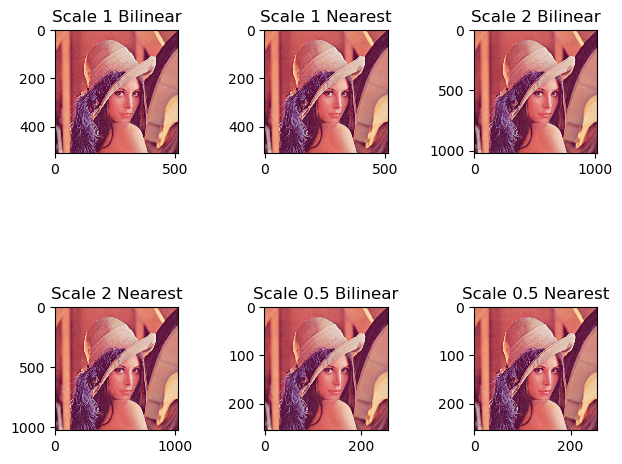

In [11]:
plt.figure(figsize=(7,7), dpi=100)
plt.subplots_adjust(hspace=0.1, wspace=0.7)
resizebuiltin(img2)

In [ ]:
# Bilinear interpolation user defined

w1, h1 = img2.shape[:2]

ratios1 = [1, 2, 0.5]

neww1 = int(w1*2)
newh1 = int(h1*2)


new1 = np.zeros([int(neww1), int(newh1), 3]);


count = 0
for i in range(neww1-1):
    for j in range(newh1-1):
        count = count+1
        # corresponding position in input image
        x_in = j/2
        y_in = i/2
        
        #print(x_in, y_in)
        
        # Neighbours for position (x_in, y_in)
        x_prev = int(np.floor(x_in))
        x_next = x_prev + 1
        y_prev = int(np.floor(y_in))
        y_next = y_prev + 1
        
#         print(x_prev, x_next, y_prev, y_next)
        # Sanitize bounds - no need to check for < 0
        # This is useful when we are scalling up because input image will not contain end point(i.e., 256 if size is 255x255
        # and if we scale it by 2  )
        x_prev = min(x_prev, w1 - 1)
        x_next = min(x_next, w1 - 1)
        y_prev = min(y_prev, h1 - 1)
        y_next = min(y_next, h1 - 1)

        # Distances between neighbour nodes in input space
        Dy_next = y_next - y_in;
        Dy_prev = 1. - Dy_next; # because next - prev = 1
        Dx_next = x_next - x_in;
        Dx_prev = 1. - Dx_next; # because next - prev = 1

        
        new1[i][j] = (Dy_prev * (img2[y_next][x_prev] * Dx_next + img2[y_next][x_next] * Dx_prev)) + (Dy_next * (img2[y_prev][x_prev] * Dx_next + img2[y_prev][x_next] * Dx_prev))
            

new1 = np.array(new1, dtype='uint8')

print(new1.shape)
cv2.imshow('ima', new1)
cv2.imshow('ima1', img2)
cv2.waitKey(0)
cv2.destroyAllWindows()
print(count)